In [3]:
from openx.utils import *
from IPython import display

dataset = 'kuka' # @param ['fractal20220817_data', 'kuka', 'bridge', 'taco_play', 'jaco_play', 'berkeley_cable_routing', 'roboturk', 'nyu_door_opening_surprising_effectiveness', 'viola', 'berkeley_autolab_ur5', 'toto', 'language_table', 'columbia_cairlab_pusht_real', 'stanford_kuka_multimodal_dataset_converted_externally_to_rlds', 'nyu_rot_dataset_converted_externally_to_rlds', 'stanford_hydra_dataset_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'nyu_franka_play_dataset_converted_externally_to_rlds', 'maniskill_dataset_converted_externally_to_rlds', 'furniture_bench_dataset_converted_externally_to_rlds', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'ucsd_kitchen_dataset_converted_externally_to_rlds', 'ucsd_pick_and_place_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'usc_cloth_sim_converted_externally_to_rlds', 'utokyo_pr2_opening_fridge_converted_externally_to_rlds', 'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds', 'utokyo_saytap_converted_externally_to_rlds', 'utokyo_xarm_pick_and_place_converted_externally_to_rlds', 'utokyo_xarm_bimanual_converted_externally_to_rlds', 'robo_net', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'kaist_nonprehensile_converted_externally_to_rlds', 'stanford_mask_vit_converted_externally_to_rlds', 'tokyo_u_lsmo_converted_externally_to_rlds', 'dlr_sara_pour_converted_externally_to_rlds', 'dlr_sara_grid_clamp_converted_externally_to_rlds', 'dlr_edan_shared_control_converted_externally_to_rlds', 'asu_table_top_converted_externally_to_rlds', 'stanford_robocook_converted_externally_to_rlds', 'eth_agent_affordances', 'imperialcollege_sawyer_wrist_cam', 'iamlab_cmu_pickup_insert_converted_externally_to_rlds', 'uiuc_d3field', 'utaustin_mutex', 'berkeley_fanuc_manipulation', 'cmu_food_manipulation', 'cmu_play_fusion', 'cmu_stretch', 'berkeley_gnm_recon', 'berkeley_gnm_cory_hall', 'berkeley_gnm_sac_son']
display_key = 'image'

ModuleNotFoundError: No module named 'openx.utils'; 'openx' is not a package

In [2]:
ds, iterator = get_dataseet(dataset, display_key=display_key)

2025-01-18 15:44:20.071652: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


FeaturesDict({
    'steps': Dataset({
        'action': FeaturesDict({
            'base_displacement_vector': Tensor(shape=(2,), dtype=float32),
            'base_displacement_vertical_rotation': Tensor(shape=(1,), dtype=float32),
            'gripper_closedness_action': Tensor(shape=(1,), dtype=float32),
            'rotation_delta': Tensor(shape=(3,), dtype=float32),
            'terminate_episode': Tensor(shape=(3,), dtype=int32),
            'world_vector': Tensor(shape=(3,), dtype=float32),
        }),
        'is_first': bool,
        'is_last': bool,
        'is_terminal': bool,
        'observation': FeaturesDict({
            'clip_function_input/base_pose_tool_reached': Tensor(shape=(7,), dtype=float32),
            'clip_function_input/workspace_bounds': Tensor(shape=(3, 3), dtype=float32),
            'gripper_closed': Tensor(shape=(1,), dtype=float32),
            'height_to_bottom': Tensor(shape=(1,), dtype=float32),
            'image': Image(shape=(512, 640, 3), dtype=

2025-01-18 15:44:24.230437: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-18 15:44:27.691431: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


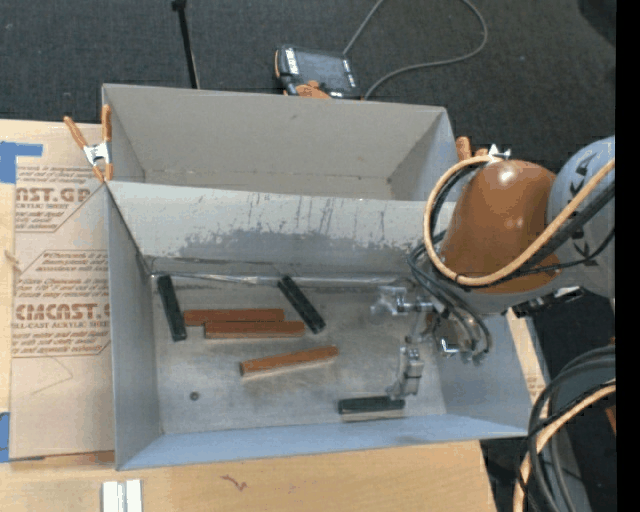

In [3]:
episode = next(iterator)
images = get_image_from_episode(episode, display_key=display_key)
display.Image(as_gif(images))

In [4]:
from PIL import Image
import numpy as np
import os
os.environ["IMAGEIO_FFMPEG_EXE"] = "/opt/homebrew/bin/ffmpeg"
from moviepy import *
# Suppose you have a list of PIL Images:
# images = [Image.open('frame1.png'), Image.open('frame2.png'), ...]

# Ensure all images have the same mode and size:
# For demonstration, assume they are already consistent.

# Convert PIL images to numpy arrays (RGB):
frames = [np.array(img.convert('RGB')) for img in images]

# Create a video clip from the frames
# Set fps (frames per second) as desired, e.g., 24 fps.
clip = ImageSequenceClip(frames, fps=10)

# Write the clip to an mp4 file using a codec like 'libx264'
clip.write_videofile("output.mp4", codec='libx264', audio=False)


MoviePy - Building video output.mp4.
MoviePy - Writing video output.mp4



MoviePy - Done !
MoviePy - video ready output.mp4


In [2]:
'''
base_pose_tool_reached_(t+1) = base_pose_tool_reached_(t) + vector_to_go(t) + action[world_vector](t)
base_pose_tool_reached -> 7D pose of the tool in the world frame
'''


'\nbase_pose_tool_reached_(t+1) = base_pose_tool_reached_(t) + vector_to_go(t) + action[world_vector](t)\nbase_pose_tool_reached -> 7D pose of the tool in the world frame\n'

In [6]:
iter_steps = iter(episode['steps'])
step = next(iter_steps)
step['observation'].keys()

dict_keys(['clip_function_input/base_pose_tool_reached', 'clip_function_input/workspace_bounds', 'gripper_closed', 'height_to_bottom', 'image', 'natural_language_embedding', 'natural_language_instruction', 'task_id'])

In [7]:
iter_steps = iter(episode['steps'])
base_tool_poses = [base['observation']['clip_function_input/base_pose_tool_reached'] for base in iter_steps]

2025-01-18 15:44:28.368198: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
iter_steps = iter(episode['steps'])
gripper_states = [gripper['observation']['gripper_closed'] for gripper in iter_steps]

In [9]:
iter_steps = iter(episode['steps'])
actions = [gripper['action'] for gripper in iter_steps]

2025-01-18 15:44:28.401527: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
actions[0]

{'base_displacement_vector': <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 'base_displacement_vertical_rotation': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'gripper_closedness_action': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'rotation_delta': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.        ,  0.        , -0.05035248], dtype=float32)>,
 'terminate_episode': <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 0], dtype=int32)>,
 'world_vector': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.01232282,  0.03282175, -0.11713262], dtype=float32)>}

In [11]:

import mujoco,sys
import numpy as np
import matplotlib.pyplot as plt
from mujoco_usage.mujoco_parser import *
from helper.transformation import *
from helper.slider import *
from helper.utility import *

In [12]:
xml_path = './mujoco_menagerie/kuka_iiwa_14/scene.xml'
env = MuJoCoParserClass(name='Tabletop',rel_xml_path=xml_path,verbose=True)

name:[Tabletop] dt:[0.002] HZ:[500]
n_qpos:[7] n_qvel:[7] n_qacc:[7] n_ctrl:[7]

n_body:[10]
 [0/10] [world] mass:[0.00]kg
 [1/10] [base] mass:[5.00]kg
 [2/10] [link1] mass:[5.76]kg
 [3/10] [link2] mass:[6.35]kg
 [4/10] [link3] mass:[3.50]kg
 [5/10] [link4] mass:[3.50]kg
 [6/10] [link5] mass:[3.50]kg
 [7/10] [link6] mass:[1.80]kg
 [8/10] [link7] mass:[1.20]kg
 [9/10] [tcp_link] mass:[0.00]kg
body_total_mass:[30.61]kg

n_geom:[63]
geom_names:['floor', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

n_joint:[7]
 [0/7] [joint1] axis:[0. 0. 1.]
 [1/7] [joint2] axis:[0. 0. 1.]
 [2/7] [joint3] axis:[0. 0. 1.]
 [3/7] [joint4] axis:[0. 0. 1.]
 [4/7] [joint5] axis:[0. 0. 1.]


In [13]:
env.reset(step=True)
env.init_viewer(transparent=True)
while env.is_viewer_alive():
    env.step()
    if env.loop_every(tick_every=10):
        env.plot_T()
        env.plot_time() # time
        env.plot_contact_info() # contact information
        env.render()
print ("Done.")

2025-01-18 15:42:19.221 python[3851:55210] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-18 15:42:19.221 python[3851:55210] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Done.


2025-01-18 15:42:20.469 python[3851:55210] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


In [13]:
env.joint_names

['joint1', 'joint2', 'joint3', 'joint4', 'joint5', 'joint6', 'joint7']

In [14]:
sliders = MultiSliderClass( # Slider for EE control
    n_slider      = 7,
    title         = 'Sliders for [%s] Control'%(env.name),
    window_width  = 450,
    window_height = 300,
    x_offset      = 0,
    y_offset      = 100,
    slider_width  = 300,
    label_texts   = ['X','Y','Z','Roll-deg','Pitch-deg','Yaw-deg','Gripper'],
    slider_mins   = [-1,-1,0.1,-180,-180,-180,0],
    slider_maxs   = [+1,+1,0.6,+180,+180,+180,2],
    slider_vals   = [0,0,0,0,0,0,0],
    resolutions   = [0.02,0.02,0.02,3.6,3.6,3.6,0.04], # range/50
    verbose       = False,
)
joint_names = ['joint1',
 'joint2',
 'joint3',
 'joint4',
 'joint5',
 'joint6',
 'joint7'] #env.joint_names

q0 = np.zeros(len(joint_names))

print(q0.shape)
# q0 = np.deg2rad([-35.63,-78.2,153.42,-75.22,54.37,-0.])
p0 = env.get_p_body(body_name='base')+np.array([0.3,0.0,0.1])
R0 = rpy_deg2r([0,180,0])
env.init_viewer(
    title       = 'Tabletop',
    transparent = False,
    azimuth     = 133,
    distance    = 3.5,
    elevation   = -42.4,
    lookat      = (-0.06,0.07,0.31),
)
env.reset() # reset
env.forward(q=q0,joint_names=joint_names) # initial position

# Move object positions
obj_names = env.get_body_names(prefix='obj_')
n_obj = len(obj_names)
obj_xyzs = sample_xyzs(
    n_sample  = n_obj,
    x_range   = [+0.6,+1.0],
    y_range   = [-0.45,+0.45],
    z_range   = [0.8,0.81],
    min_dist  = 0.2,
    xy_margin = 0.0
)
for obj_idx in range(n_obj):
    env.set_p_base_body(body_name=obj_names[obj_idx],p=obj_xyzs[obj_idx,:])
    env.set_R_base_body(body_name=obj_names[obj_idx],R=np.eye(3,3))
env.set_geom_color(body_names_to_color=obj_names,rgba_list=get_colors(n_obj))
    
# Loop
q_ik_init = q0.copy()
while env.is_viewer_alive():
    
    # Update
    sliders.update() # update slider
    xyzrpyg = sliders.get_slider_values()
    qpos,ik_err_stack,ik_info = solve_ik(
        env                = env,
        joint_names_for_ik = joint_names,
        body_name_trgt     = 'tcp_link',
        q_init             = q_ik_init,
        p_trgt             = xyzrpyg[:3]+p0,
        R_trgt             = rpy_deg2r(xyzrpyg[3:6])@R0,
        max_ik_tick        = 500,
        ik_stepsize        = 1.0,
        ik_eps             = 1e-2,
        ik_th              = np.radians(5.0),
        render             = False,
        verbose_warning    = False,
    )
    ik_err = np.abs(ik_err_stack).max() # IK error
    if ik_err < 1e-2: q_ik_init = qpos.copy()
    else: q_ik_init = q0.copy()
    # env.step(np.array([0 ,0 ,0 ,-1.57079, 0, 1.57079, -0.7853,255]))
    env.step( # dynamic update
        ctrl        = qpos)

    # Click handler
    xyz_click,flag_click = env.get_xyz_left_double_click()
    if flag_click: print ("[CLICKED] p:%s"%(xyz_click))
    
    # Render 
    if env.loop_every(HZ=10):
        env.plot_T(
            T=env.get_T_body(body_name='base'),
            axis_len=0.5,print_xyz=False)
        env.plot_text(
            p=env.get_p_body(body_name='base')+np.array([0,0,0.5]),
            label = 'time:[%.2f]sec ik_err:[%.3f]'%(env.get_sim_time(),ik_err))
        env.plot_body_T(body_name='tcp_link',axis_len=0.1,axis_width=0.005)
        env.plot_contact_info(
            r_arrow=0.005,h_arrow=0.1,rgba_contact=(1,0,0,0.5),plot_sphere=False)
        plot_ik_info(env=env,ik_info=ik_info)
        if xyz_click is not None:
            env.plot_sphere(p=xyz_click,r=0.01,rgba=(1,0,0,0.5))
        env.render()

# Close
env.close_viewer()
sliders.close()
print ("Done.")

(7,)


2025-01-18 15:44:30.667 python[3876:57320] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-18 15:44:30.667 python[3876:57320] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Done.


2025-01-18 15:45:48.357 python[3876:57320] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


In [16]:
q_ik_init = np.zeros(7)

q_traj = []
# R0 = rpy_deg2r([-180,0,90])
for ik_target in base_tool_poses:
    print(ik_target)
    # rot_target = quat2r(ik_target[3:].numpy())
    # rpy_target = r2rpy(rot_target)
    temp = quat2rpy(ik_target[3:].numpy())
    # print(temp)
    # temp[0] *= -1
    # temp[2] += np.pi/2
    # print(np.rad2deg(temp))
    rot_target = rpy2r(temp)
    # print(rot_target, rpy_target, temp)
    qpos,ik_err_stack,ik_info = solve_ik(
        env                = env,
        joint_names_for_ik = joint_names,
        body_name_trgt     = 'tcp_link',
        q_init             = q_ik_init,
        p_trgt             = ik_target[:3].numpy(),
        R_trgt             = rot_target,
        max_ik_tick        = 500,
        ik_stepsize        = 1.0,
        ik_eps             = 1e-2,
        ik_th              = np.radians(5.0),
        render             = False,
        verbose_warning    = False,
    )
    ik_err = np.abs(ik_err_stack).max() # IK error
    if ik_err < 1e-2: q_ik_init = qpos.copy()
    else: q_ik_init = q0.copy()
    # print(ik_err, ik_target[:3], rot_target)
    q_traj.append(qpos)
    # break

tf.Tensor(
[ 4.8907891e-01 -2.9387731e-02  1.8713263e-01  2.7854574e-05
  9.9999315e-01  1.6571066e-04 -3.6948505e-03], shape=(7,), dtype=float32)
tf.Tensor(
[ 5.0037187e-01  4.3933322e-03  6.6869602e-02 -2.5656292e-02
  9.9966872e-01  2.0248555e-04 -2.0542855e-03], shape=(7,), dtype=float32)
tf.Tensor(
[ 0.5296739   0.07880751  0.06987951 -0.02569977  0.9996656   0.002204
  0.00182892], shape=(7,), dtype=float32)
tf.Tensor(
[ 5.2884465e-01  7.4111544e-02  7.0310779e-02 -2.3053678e-02
  9.9973410e-01  4.5048710e-04  2.0585589e-04], shape=(7,), dtype=float32)
tf.Tensor(
[ 5.2612412e-01  1.0339644e-01  2.4678394e-01 -5.4798517e-02
  9.9848872e-01  7.2216411e-04  4.1031889e-03], shape=(7,), dtype=float32)
tf.Tensor(
[ 5.2883291e-01  7.7819146e-02  2.8960848e-01 -8.8206939e-02
  9.9609578e-01 -2.3805322e-04  3.5623417e-03], shape=(7,), dtype=float32)


In [17]:
joint_names = ['joint1',
 'joint2',
 'joint3',
 'joint4',
 'joint5',
 'joint6',
 'joint7'] #env.joint_names

q0 = np.zeros(len(joint_names))
env.init_viewer(
    title       = 'Tabletop',
    transparent = False,
    azimuth     = 133,
    distance    = 3.5,
    elevation   = -42.4,
    lookat      = (-0.06,0.07,0.31),
)
env.reset() # reset
env.forward(q=q0,joint_names=joint_names) # initial position


q_ik_init = q0.copy()
qpos = q_traj[0]
idx = 0
for _ in range(5):
    env.step(qpos)
    
while env.is_viewer_alive():
    env.step( # dynamic update
        ctrl        = qpos)

    # Click handler
    xyz_click,flag_click = env.get_xyz_left_double_click()
    if flag_click: print ("[CLICKED] p:%s"%(xyz_click))
    
    # Render 
    if env.loop_every(HZ=10):
        if idx < len(q_traj)-1:
            idx += 1
        else: idx = 0
        qpos = q_traj[idx]
        env.plot_T(
            T=env.get_T_body(body_name='base'),
            axis_len=0.5,print_xyz=False)
        env.plot_text(
            p=env.get_p_body(body_name='base')+np.array([0,0,0.5]),
            label = 'tick:[%d]time:[%.2f]'%(idx, env.get_sim_time()))
        env.plot_body_T(body_name='tcp_link',axis_len=0.1,axis_width=0.005)
        env.plot_contact_info(
            r_arrow=0.005,h_arrow=0.1,rgba_contact=(1,0,0,0.5),plot_sphere=False)
        env.render()

# Close
env.close_viewer()
sliders.close()
print ("Done.")

Done.


In [16]:
### Plot Trajectory

In [18]:

def quat2r(q):
    """
        Convert Quaternion to rotation matrix
    """
    q = np.asarray(q, dtype=np.float64)
    n = np.dot(q, q)
    if n < np.finfo(q.dtype).eps:
        return np.identity(3)
    q *= np.sqrt(2.0 / n)
    q = np.outer(q, q)
    return np.array([
        [1.0 - q[2, 2] - q[3, 3], q[1, 2] - q[3, 0], q[1, 3] + q[2, 0]],
        [q[1, 2] + q[3, 0], 1.0 - q[1, 1] - q[3, 3], q[2, 3] - q[1, 0]],
        [q[1, 3] - q[2, 0], q[2, 3] + q[1, 0], 1.0 - q[1, 1] - q[2, 2]]
    ])

def quat2rpy(q):
    """
        Convert Quaternion to Roll Pitch Yaw
    """
    q = np.array(q)
    r = np.zeros(3)
    r[0] = np.arctan2(2*(q[0]*q[1] + q[2]*q[3]), 1-2*(q[1]**2 + q[2]**2))
    r[1] = np.arcsin(2*(q[0]*q[2] - q[3]*q[1]))
    r[2] = np.arctan2(2*(q[0]*q[3] + q[1]*q[2]), 1-2*(q[2]**2 + q[3]**2))
    return r

In [19]:
joint_names = ['joint1',
 'joint2',
 'joint3',
 'joint4',
 'joint5',
 'joint6',
 'joint7'] 

q0 = np.zeros(len(joint_names))
env.init_viewer(
    title       = 'Tabletop',
    transparent = False,
    azimuth     = 133,
    distance    = 3.5,
    elevation   = -42.4,
    lookat      = (-0.06,0.07,0.31),
)
env.reset() # reset
# env.forward(q=q0,joint_names=joint_names) # initial position

import matplotlib.pyplot as plt

# Choose a colormap (e.g., "viridis")
cmap = plt.get_cmap("jet")

    # env.plot_T

    # env.render()
idx = 0
while env.is_viewer_alive():
    # env.step(qpos)
    env.forward(q=q0,joint_names=joint_names) 
    # env.forward(q=qpos,joint_names=joint_names)

    # # Render 
    if env.loop_every(HZ=0.5):
        for i, (state, ac) in enumerate(zip(base_tool_poses, actions)):
            gt_ee_rot = state[3:7].numpy()
            gt_ee_pos = state[:3].numpy()
            action_pos_delta = ac['world_vector'].numpy()
            gt_ee_rot = quat2r(gt_ee_rot)
            action_pos_delta = ac['world_vector'].numpy()
            rgba = cmap(2*i/len(base_tool_poses))
            env.plot_arrow_fr2to(
                p_fr=gt_ee_pos,p_to=gt_ee_pos+action_pos_delta,
                rgba=[rgba[0],rgba[1],rgba[2],0.5],r=0.002,)
            env.plot_T(p=gt_ee_pos,R=gt_ee_rot,axis_len=0.02,axis_width=0.001,
                       print_xyz=False,plot_sphere=True,sphere_rgba=rgba,sphere_r=0.005)
        # env.render()
        for i, (state, ac) in enumerate(zip(base_tool_poses, actions)):
            gt_ee_rot = state[3:7].numpy()
            gt_ee_pos = state[:3].numpy()
            gt_ee_rot = quat2r(gt_ee_rot)
            action_pos_rot = ac['rotation_delta'].numpy()
            action_pos_rot = rpy2r(action_pos_rot)
            new_rot = action_pos_rot.T@gt_ee_rot
            rgba = cmap(2*i/len(base_tool_poses))
            env.plot_T(p=gt_ee_pos,R=new_rot,axis_len=0.02,axis_width=0.001,axis_rgba=[[1.0,0.3,0.0,0.9],[0.0,1.0,0.3,0.9],[0.3,0.0,1.0,0.9]],
                       print_xyz=False,plot_sphere=False,sphere_rgba=rgba,sphere_r=0.005)
        env.render()

# Close
env.close_viewer()
print ("Done.")

Done.
